In [70]:
# Standard module imports
import numpy as np
import scipy.stats as stats
import pandas as pd
import sys
import linmix
%matplotlib inline

# Useful directories
gh_dir = '/Users/ttshimiz/Github/'
sed_fit_dir = gh_dir + 'bat-agn-sed-fitting/'
casey_dir = sed_fit_dir + 'analysis/casey_bayes_results/'
data_dir = gh_dir + 'bat-data/'

In [2]:
# Setup the figures
execfile('../code/figure-setup.py')

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [167]:
# Upload the fitting results for the C12 model
bat_c12 = pd.read_csv('../data/bat-agn-c12-params.csv', index_col=0)

# Remove 'bad' sources
radio_loud_sources = np.array(['PICTORA', '3C111.0', '3C120',
                              '2MASXJ23272195+1524375', 'PKS2331-240',
                              'HB890241+622', 'Mrk3'])
bat_c12 = bat_c12.drop(radio_loud_sources)
bat_c12.loc['UGC06728', 'lir_sf'] += 2.0
bat_c12.loc['UGC06728', 'mdust'] += 2.0

In [168]:
# Upload the WISE and Herschel data
# Upload the BAT fluxes for Herschel and WISE
herschel_data = pd.read_csv(data_dir+'bat_herschel.csv', index_col=0,
                            na_values=0)
wise_data = pd.read_csv(data_dir+'bat_wise.csv', index_col=0,
                        usecols=[0, 1, 2, 4, 5, 7, 8, 10, 11], na_values=0)

# SPIRE fluxes that are seriously contaminated by a companion should be upper limits
psw_flag = herschel_data['PSW_flag']
pmw_flag = herschel_data['PMW_flag']
plw_flag = herschel_data['PLW_flag']

herschel_data['PSW_err'][psw_flag == 'AD'] = herschel_data['PSW'][psw_flag == 'AD']
herschel_data['PSW'][psw_flag == 'AD'] = np.nan
herschel_data['PMW_err'][pmw_flag == 'AD'] = herschel_data['PMW'][pmw_flag == 'AD']
herschel_data['PMW'][pmw_flag == 'AD'] = np.nan
herschel_data['PLW_err'][plw_flag == 'AD'] = herschel_data['PLW'][plw_flag == 'AD']
herschel_data['PLW'][plw_flag == 'AD'] = np.nan

/Users/ttshimiz/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/ttshimiz/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/ttshimiz/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/ttshimiz/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:16: SettingWithCopyWarning

In [169]:
ind_w3_h70 = (herschel_data['PACS70'] > 0) & (wise_data['W3'] > 0)
rho_w3_h70 = stats.pearsonr(wise_data.loc[ind_w3_h70, 'W3'], herschel_data.loc[ind_w3_h70, 'PACS70'])

ind_w3_h160 = (herschel_data['PACS160'] > 0) & (wise_data['W3'] > 0)
rho_w3_h160 = stats.pearsonr(wise_data.loc[ind_w3_h160, 'W3'], herschel_data.loc[ind_w3_h160, 'PACS160'])

ind_w3_h250 = (herschel_data['PSW'] > 0) & (wise_data['W3'] > 0)
rho_w3_h250 = stats.pearsonr(wise_data.loc[ind_w3_h250, 'W3'], herschel_data.loc[ind_w3_h250, 'PSW'])

ind_w4_h70 = (herschel_data['PACS70'] > 0) & (wise_data['W4'] > 0)
rho_w4_h70 = stats.pearsonr(wise_data.loc[ind_w4_h70, 'W4'], herschel_data.loc[ind_w4_h70, 'PACS70'])

ind_w4_h160 = (herschel_data['PACS160'] > 0) & (wise_data['W4'] > 0)
rho_w4_h160 = stats.pearsonr(wise_data.loc[ind_w4_h160, 'W4'], herschel_data.loc[ind_w4_h160, 'PACS160'])

ind_w4_h250 = (herschel_data['PSW'] > 0) & (wise_data['W4'] > 0)
rho_w4_h250 = stats.pearsonr(wise_data.loc[ind_w4_h250, 'W4'], herschel_data.loc[ind_w4_h250, 'PSW'])

print 'Correlation Coefficients:'
print 'W3 vs. H70: ', rho_w3_h70[0]
print 'W3 vs. H160: ', rho_w3_h160[0]
print 'W3 vs. H250: ', rho_w3_h250[0]
print 'W4 vs. H70: ', rho_w4_h70[0]
print 'W4 vs. H160: ', rho_w4_h160[0]
print 'W4 vs. H250: ', rho_w4_h250[0]

Correlation Coefficients:
W3 vs. H70:  0.693239556792
W3 vs. H160:  0.665995370015
W3 vs. H250:  0.698873301807
W4 vs. H70:  0.639830196891
W4 vs. H160:  0.581619200204
W4 vs. H250:  0.60241877469


In [176]:
use_sources = bat_c12[bat_c12['agn_frac_flag'] <= 0].index
flux_ratios = pd.DataFrame(index=use_sources)

flux_ratios['agn_frac'] = bat_c12['agn_frac']
flux_ratios['agn_frac_err_low'] = bat_c12['agn_frac_err_low']
flux_ratios['agn_frac_err_high'] = bat_c12['agn_frac_err_high']
flux_ratios['agn_frac_flag'] = bat_c12['agn_frac_flag']

flux_ratios['W1/W2'] = wise_data['W1']/wise_data['W2']
flux_ratios['W2/W3'] = wise_data['W2']/wise_data['W3']
flux_ratios['W3/W4'] = wise_data['W3']/wise_data['W4']
flux_ratios['W3/H70'] = wise_data['W3']/herschel_data['PACS70']
flux_ratios['W3/H70_err'] = flux_ratios['W3/H70']*np.sqrt((wise_data['W3_err']/wise_data['W3'])**2 +
                            (herschel_data['PACS70_err']/herschel_data['PACS70'])**2 -
                            (2*0.69*wise_data['W3_err']*herschel_data['PACS70_err']/wise_data['W3']/herschel_data['PACS70']))
flux_ratios['W3/H160'] = wise_data['W3']/herschel_data['PACS160']
flux_ratios['W3/H160_err'] = flux_ratios['W3/H160']*np.sqrt((wise_data['W3_err']/wise_data['W3'])**2 +
                            (herschel_data['PACS160_err']/herschel_data['PACS160'])**2 -
                            (2*0.67*wise_data['W3_err']*herschel_data['PACS160_err']/wise_data['W3']/herschel_data['PACS160']))
flux_ratios['W3/H250'] = wise_data['W3']/herschel_data['PSW']
flux_ratios['W3/H250_err'] = flux_ratios['W3/H250']*np.sqrt((wise_data['W3_err']/wise_data['W3'])**2 +
                            (herschel_data['PSW_err']/herschel_data['PSW'])**2 -
                            (2*0.70*wise_data['W3_err']*herschel_data['PSW_err']/wise_data['W3']/herschel_data['PSW']))
flux_ratios['W4/H70'] = wise_data['W4']/herschel_data['PACS70']
flux_ratios['W4/H70_err'] = flux_ratios['W4/H70']*np.sqrt((wise_data['W4_err']/wise_data['W4'])**2 +
                            (herschel_data['PACS70_err']/herschel_data['PACS70'])**2 -
                            (2*0.64*wise_data['W4_err']*herschel_data['PACS70_err']/wise_data['W4']/herschel_data['PACS70']))
flux_ratios['W4/H160'] = wise_data['W4']/herschel_data['PACS160']
flux_ratios['W4/H160_err'] = flux_ratios['W4/H160']*np.sqrt((wise_data['W4_err']/wise_data['W4'])**2 +
                            (herschel_data['PACS160_err']/herschel_data['PACS160'])**2 -
                            (2*0.64*wise_data['W4_err']*herschel_data['PACS160_err']/wise_data['W4']/herschel_data['PACS160']))
flux_ratios['W4/H250'] = wise_data['W4']/herschel_data['PSW']
flux_ratios['W4/H250_err'] = flux_ratios['W4/H250']*np.sqrt((wise_data['W4_err']/wise_data['W4'])**2 +
                            (herschel_data['PSW_err']/herschel_data['PSW'])**2 -
                            (2*0.64*wise_data['W4_err']*herschel_data['PSW_err']/wise_data['W4']/herschel_data['PSW']))
flux_ratios['H70/H160'] = herschel_data['PACS70']/herschel_data['PACS160']
flux_ratios['H70/H250'] = herschel_data['PACS70']/herschel_data['PSW']
flux_ratios['H160/H250'] = herschel_data['PACS160']/herschel_data['PSW']

In [171]:
hrs_casey = pd.read_csv(casey_dir+'hrs_beta_fixed_2_wturn_gaussianPrior/final_fit_results_beta_fixed_2_wturn_gaussianPrior_hrs.csv',
                        index_col=0)
hrs_casey['agn_frac'] = (10**hrs_casey['lir_powlaw'] - 1./3.*10**hrs_casey['lir_bb'])/10**(hrs_casey['lir_total'])
hrs_data = pd.read_table('../../hrs-data/hrs_photometry.txt', index_col=0)
hrs_sed = pd.DataFrame({'W3': hrs_data['S12'], 'W4': hrs_data['S22'],
                        'PACS100': hrs_data['S100']*1000, 'PACS160': hrs_data['S160']*1000,
                        'PSW': hrs_data['S250'], 'PMW': hrs_data['S350'],
                        'PLW': hrs_data['S500']})
hrs_err = pd.DataFrame({'W3_err': hrs_data['err12'], 'W4_err': hrs_data['err22'],
                        'PACS100_err': hrs_data['err100']*1000, 'PACS160_err': hrs_data['err160']*1000,
                        'PSW_err': hrs_data['err_tot250'], 'PMW_err': hrs_data['err_tot350'],
                        'PLW_err': hrs_data['err_tot500']})
hrs_flag = hrs_data[['Flag12', 'Flag22', 'Flag100', 'Flag160', 'Flag250', 'Flag350', 'Flag500']]

hrs_err.loc[hrs_flag['Flag12'] == 0, 'W3_err'] = 5./3.*hrs_err.loc[hrs_flag['Flag12'] == 0, 'W3_err']
hrs_err.loc[hrs_flag['Flag22'] == 0, 'W4_err'] = 5./3.*hrs_err.loc[hrs_flag['Flag22'] == 0, 'W4_err']
hrs_err.loc[hrs_flag['Flag100'] == 0, 'PACS100_err'] = 5./3.*hrs_sed.loc[hrs_flag['Flag100'] == 0, 'PACS100']
hrs_err.loc[hrs_flag['Flag160'] == 0, 'PACS160_err'] = 5./3.*hrs_sed.loc[hrs_flag['Flag160'] == 0, 'PACS160']
hrs_err.loc[hrs_flag['Flag250'] == 0, 'PSW_err'] = 5./3.*hrs_sed.loc[hrs_flag['Flag250'] == 0, 'PSW']
hrs_err.loc[hrs_flag['Flag350'] == 0, 'PMW_err'] = 5./3.*hrs_sed.loc[hrs_flag['Flag350'] == 0, 'PMW']
hrs_err.loc[hrs_flag['Flag500'] == 0, 'PLW_err'] = 5./3.*hrs_sed.loc[hrs_flag['Flag500'] == 0, 'PLW']

hrs_sed.loc[hrs_flag['Flag12'] == 0, 'W3'] = np.nan
hrs_sed.loc[hrs_flag['Flag22'] == 0, 'W4'] = np.nan
hrs_sed.loc[hrs_flag['Flag100'] == 0, 'PACS100'] = np.nan
hrs_sed.loc[hrs_flag['Flag160'] == 0, 'PACS160'] = np.nan
hrs_sed.loc[hrs_flag['Flag250'] == 0, 'PSW'] = np.nan
hrs_sed.loc[hrs_flag['Flag350'] == 0, 'PMW'] = np.nan
hrs_sed.loc[hrs_flag['Flag500'] == 0, 'PLW'] = np.nan

In [172]:
flux_ratios_hrs = pd.DataFrame(index=hrs_sed.index)
flux_ratios_hrs['W3/H160'] = hrs_sed['W3']/hrs_sed['PACS160']
flux_ratios_hrs['W3/H250'] = hrs_sed['W3']/hrs_sed['PSW']
flux_ratios_hrs['W4/H160'] = hrs_sed['W4']/hrs_sed['PACS160']
flux_ratios_hrs['W4/H250'] = hrs_sed['W4']/hrs_sed['PSW']
flux_ratios_hrs['agn_frac'] = hrs_casey['agn_frac']

flux_ratios_hrs = flux_ratios_hrs.drop([4, 144, 288, 296])
hrs_data = hrs_data.drop([4, 144, 296])

In [173]:
kf_casey = pd.read_csv(casey_dir+'kingfish_beta_fixed_2_wturn_gaussianPrior/final_fit_results_kingfish_casey.csv',
                       index_col=0)
kf_casey['agn_frac'] = (10**kf_casey['lir_powlaw'] - 1./3.*10**kf_casey['lir_bb'])/10**(kf_casey['lir_total'])
kf_dir = '/Users/ttshimiz/Dropbox/Research/Thesis/Other_surveys/KINGFISH/'
kf_data = pd.read_table(kf_dir+'kingfish_data.txt', delimiter='\t', index_col=0, na_values=0)

flux_ratios_kf = pd.DataFrame(index=kf_data.index)
flux_ratios_kf['W3/H70'] = kf_data['IRAC4']/kf_data['PACS70']
flux_ratios_kf['W3/H160'] = kf_data['IRAC4']/kf_data['PACS160']
flux_ratios_kf['W3/H250'] = kf_data['IRAC4']/kf_data['PSW']
flux_ratios_kf['W4/H70'] = kf_data['MIPS24']/kf_data['PACS70']
flux_ratios_kf['W4/H160'] = kf_data['MIPS24']/kf_data['PACS160']
flux_ratios_kf['W4/H250'] = kf_data['MIPS24']/kf_data['PSW']
flux_ratios_kf['agn_frac'] = kf_casey['agn_frac']

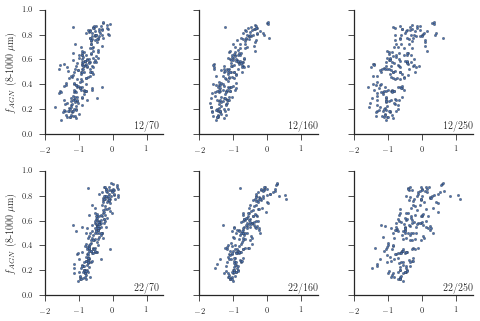

In [184]:
fig = plt.figure(figsize=(1.1*textwidth, 1.1*2./3.*textwidth))
mark_size = 6

ax1 = fig.add_subplot(231)
ax1.scatter(np.log10(flux_ratios['W3/H70'][flux_ratios['agn_frac_flag']==0]), flux_ratios['agn_frac'][flux_ratios['agn_frac_flag']==0],
            c='b', s=mark_size)
#ax1.scatter(np.log10(flux_ratios['W3/H70'][flux_ratios['agn_frac_flag']==-1]), flux_ratios['agn_frac'][flux_ratios['agn_frac_flag']==-1],
#            marker='v', s=mark_size, edgecolors='b', facecolors='None', lw=1.2)
#ax1.scatter(np.log10(flux_ratios_kf['W3/H70']), flux_ratios_kf['agn_frac'], c='r', s=mark_size)
#ax1.axhline(0.0, color='k', ls='dashed')
ax1.text(0.75, 0.1, '12/70', ha='left', va='top', transform=ax1.transAxes)
ax1.locator_params(axis='x', nbins=5)
ax1.set_ylabel(r'$f_{AGN}$ (8-1000 $\mu$m)')
ax1.set_ylim(0, 1.0)
ax1.set_xlim(-2, 1.5)
#ax12 = ax1.twinx()
#sn.kdeplot(np.log10(flux_ratios_kf['W3/H160']), ax=ax12, color='r', legend=False)
#ax12_ylim = ax12.get_ylim()
#ax12.set_ylim((0, ax12_ylim[1]*3))
#ax12.yaxis.set_ticklabels([])
#ax12.yaxis.set_ticks([])
#ax12.set_xlim(-2, 1)
#ax1.set_ylim(0, 1)

ax2 = fig.add_subplot(232)
ax2.scatter(np.log10(flux_ratios['W3/H160'][flux_ratios['agn_frac_flag']==0]), flux_ratios['agn_frac'][flux_ratios['agn_frac_flag']==0], c='b', s=mark_size)
#ax2.scatter(np.log10(flux_ratios_hrs['W3/H160']), flux_ratios_hrs['agn_frac'], c='r', s=mark_size)
#ax2.scatter(np.log10(flux_ratios_kf['W3/H160']), flux_ratios_kf['agn_frac'], c='r', s=mark_size)
ax2.yaxis.set_ticklabels([])
ax2.text(0.75, 0.1, '12/160', ha='left', va='top', transform=ax2.transAxes)
ax2.locator_params(axis='x', nbins=5)
#ax2.axhline(0.0, color='k', ls='dashed')
ax2.set_ylim(0, 1.0)
ax2.set_xlim(-2, 1.5)
#ax22 = ax2.twinx()
#sn.kdeplot(np.log10(flux_ratios_hrs['W3/H160']), ax=ax22, color='r', legend=False)
#ax22_ylim = ax22.get_ylim()
#ax22.set_ylim((ax22_ylim[0], ax22_ylim[1]*3))
#ax22.yaxis.set_ticklabels([])
#ax22.yaxis.set_ticks([])
#ax22.set_xlim(-2, 1)
#ax2.set_ylim(0, 1)

ax3 = fig.add_subplot(233)
ax3.scatter(np.log10(flux_ratios['W3/H250'][flux_ratios['agn_frac_flag']==0]), flux_ratios['agn_frac'][flux_ratios['agn_frac_flag']==0], c='b', s=mark_size)
#ax3.scatter(np.log10(flux_ratios_hrs['W3/H250']), flux_ratios_hrs['agn_frac'], c='r', s=mark_size)
#ax3.scatter(np.log10(flux_ratios_kf['W3/H250']), flux_ratios_kf['agn_frac'], c='r', s=mark_size)
ax3.yaxis.set_ticklabels([])
ax3.text(0.75, 0.1, '12/250', ha='left', va='top', transform=ax3.transAxes)
ax3.locator_params(axis='x', nbins=5)
#ax3.axhline(0.0, color='k', ls='dashed')
ax3.set_ylim(0.0, 1.0)
ax3.set_xlim(-2, 1.5)
#ax32 = ax3.twinx()
#sn.kdeplot(np.log10(flux_ratios_hrs['W3/H250']), ax=ax32, color='r', legend=False)
#ax32_ylim = ax32.get_ylim()
#ax32.set_ylim((ax32_ylim[0], ax32_ylim[1]*3))
#ax32.yaxis.set_ticklabels([])
#ax32.yaxis.set_ticks([])
#ax32.set_xlim(-2, 1)

ax4 = fig.add_subplot(234)
ax4.scatter(np.log10(flux_ratios['W4/H70'][flux_ratios['agn_frac_flag']==0]), flux_ratios['agn_frac'][flux_ratios['agn_frac_flag']==0], c='b', s=mark_size)
#ax4.scatter(np.log10(flux_ratios_kf['W4/H70']), flux_ratios_kf['agn_frac'], c='r', s=mark_size)
ax4.set_ylabel(r'$f_{AGN}$ (8-1000 $\mu$m)')
ax4.text(0.75, 0.1, '22/70', ha='left', va='top', transform=ax4.transAxes)
ax4.locator_params(axis='x', nbins=5)
#ax4.axhline(0.0, color='k', ls='dashed')
ax4.set_ylim(0, 1.0)
ax4.set_xlim(-2, 1.5)
#ax42 = ax4.twinx()
#sn.kdeplot(np.log10(flux_ratios_kf['W4/H160']), ax=ax42, color='r', legend=False)
#ax42_ylim = ax42.get_ylim()
#ax42.set_ylim((ax42_ylim[0], ax42_ylim[1]*3))
#ax42.yaxis.set_ticklabels([])
#ax42.yaxis.set_ticks([])
#ax42.set_xlim(-2, 1)
#ax4.set_ylim(0, 1)

ax5 = fig.add_subplot(235)
ax5.scatter(np.log10(flux_ratios['W4/H160'][flux_ratios['agn_frac_flag']==0]), flux_ratios['agn_frac'][flux_ratios['agn_frac_flag']==0], c='b', s=mark_size)
#ax5.scatter(np.log10(flux_ratios_hrs['W4/H160']), flux_ratios_hrs['agn_frac'], c='r', s=mark_size)
#ax5.scatter(np.log10(flux_ratios_kf['W4/H160']), flux_ratios_kf['agn_frac'], c='r', s=mark_size)
ax5.yaxis.set_ticklabels([])
ax5.text(0.75, 0.1, '22/160', ha='left', va='top', transform=ax5.transAxes)
ax5.locator_params(axis='x', nbins=5)
#ax5.axhline(0.0, color='k', ls='dashed')
ax5.set_ylim(0, 1.0)
ax5.set_xlim(-2, 1.5)
#ax52 = ax5.twinx()
#sn.kdeplot(np.log10(flux_ratios_hrs['W4/H160']), ax=ax52, color='r', legend=False)
#ax52_ylim = ax52.get_ylim()
#ax52.set_ylim((ax52_ylim[0], ax52_ylim[1]*3))
#ax52.yaxis.set_ticklabels([])
#ax52.yaxis.set_ticks([])
#ax52.set_xlim(-2, 1)
#ax5.set_ylim(0, 1)

ax6 = fig.add_subplot(236)
ax6.scatter(np.log10(flux_ratios['W4/H250'][flux_ratios['agn_frac_flag']==0]), flux_ratios['agn_frac'][flux_ratios['agn_frac_flag']==0], c='b', s=mark_size)
#ax6.scatter(np.log10(flux_ratios_hrs['W4/H250']), flux_ratios_hrs['agn_frac'], c='r', s=mark_size)
#ax6.scatter(np.log10(flux_ratios_kf['W4/H250']), flux_ratios_kf['agn_frac'], c='r', s=mark_size)
ax6.yaxis.set_ticklabels([])
ax6.text(0.75, 0.1, '22/250', ha='left', va='top', transform=ax6.transAxes)
ax6.locator_params(axis='x', nbins=5)
#ax6.axhline(0.0, color='k', ls='dashed')
ax6.set_ylim(0, 1.0)
ax6.set_xlim(-2, 1.5)
#ax62 = ax6.twinx()
#sn.kdeplot(np.log10(flux_ratios_hrs['W4/H250']), ax=ax62, color='r', legend=False)
#ax62_ylim = ax62.get_ylim()
#ax62.set_ylim((ax62_ylim[0], ax62_ylim[1]*3))
#ax62.yaxis.set_ticklabels([])
#ax62.yaxis.set_ticks([])
#ax62.set_xlim(-2, 1)

fig.subplots_adjust(hspace=0.3, wspace=0.3)
sn.despine()

fig.savefig(figsave_dir+'agnfrac_vs_flux_ratio.pdf', bbox_inches='tight')

In [140]:
kf_info = pd.read_table('/Users/ttshimiz/Dropbox/Research/Thesis/Other_surveys/KINGFISH/kingfish_data.txt',
                        index_col=0, delimiter='\t')
kf_info[flux_ratios_kf['agn_frac'] > 0.1]

,M_opt,Nuc. Type,Dist [Mpc],Mstar,SFR,IRAC4,IRAC4_err,MIPS24,MIPS24_err,PACS70,...,PACS100,PACS100_err,PACS160,PACS160_err,PSW,PSW_err,PMW,PMW_err,PLW,PLW_err
Name,,,,,,,,,,,,,,,,,,,,,
NGC0925,-20.6,SF,9.12,9.49,0.540,0.610,0.080,0.95,0.040,10.80,...,24.70,1.20,36.50,1.80,27.700,2.000,14.800,1.100,8.030,0.580
NGC1377,-19.6,�,24.60,9.28,1.860,0.420,0.050,1.83,0.080,6.89,...,5.85,0.30,3.38,0.19,1.320,0.100,0.494,0.047,0.199,0.032
NGC1482,-20.5,SF,22.60,9.99,3.570,1.560,0.190,3.69,0.150,40.70,...,49.50,2.50,42.00,2.10,16.800,1.200,6.350,0.450,2.210,0.170
NGC2798,-19.6,SF/AGN,25.80,10.04,3.380,0.630,0.080,2.62,0.110,24.20,...,27.30,1.40,20.60,1.00,8.020,0.570,2.900,0.210,1.080,0.090
NGC3049,-18.7,SF,19.20,8.58,0.610,0.140,0.020,0.43,0.020,3.40,...,4.59,0.23,4.54,0.24,2.800,0.200,1.410,0.110,0.797,0.065
IC2574,-17.7,SF,3.79,8.20,0.057,0.066,0.009,0.28,0.010,5.61,...,7.57,0.42,9.61,0.53,7.160,0.520,4.830,0.360,2.130,0.190
NGC3265,-17.7,SF,19.60,8.70,0.380,0.100,0.010,0.30,0.010,2.47,...,3.10,0.16,2.63,0.15,1.240,0.100,0.551,0.051,0.238,0.035
NGC3773,-17.5,SF,12.40,8.31,0.160,0.048,0.006,0.14,0.006,1.29,...,1.85,0.11,1.91,0.14,1.060,0.080,0.434,0.038,0.180,0.024
NGC4236,-18.1,SF,4.45,8.36,0.130,0.220,0.030,0.55,0.020,7.46,...,12.30,0.70,18.50,1.10,11.600,0.800,7.370,0.540,4.210,0.320


In [141]:
hrs_data[flux_ratios_hrs['agn_frac']>0.1]

,CGCG,VCC,UGC,NGC,IC,Dist_Mpc,BAT_flux,Type,E_BV,a,...,err_inst250,err_inst350,err_inst500,err_conf250,err_conf350,err_conf500,err_sky250,err_sky350,err_sky500,Note
HRS_1,,,,,,,,,,,,,,,,,,,,,
3,94026,0,5617,3226,0,16.70,NaN,0,-99.990,39.36,...,3.5,2.5,2.0,19.3,15.7,11.2,27.5,17.9,7.7,-
7,154017,0,5663,3245,0,18.77,NaN,1,-99.990,20.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-
8,154020,0,5685,3254,0,19.37,NaN,6,-99.990,210.42,...,17.2,12.8,10.7,58.0,47.5,34.5,292.9,142.5,42.4,-
10,183028,0,5738,0,0,21.66,NaN,5,0.027,55.58,...,7.2,5.6,4.4,23.9,19.5,14.5,36.4,21.3,13.2,-
14,124045,0,5767,3301,0,19.16,NaN,2,-99.990,42.87,...,3.7,3.0,2.3,21.1,17.4,12.7,10.2,16.3,7.2,-
22,155029,0,5959,3414,0,20.20,NaN,1,-99.990,81.11,...,6.6,5.0,4.0,37.5,30.6,22.2,77.7,51.9,18.5,-
36,155049,0,6118,3504,0,21.94,NaN,4,0.026,112.98,...,46.4,17.5,10.4,48.9,40.0,29.0,209.1,111.4,52.8,-
68,186045,0,0,0,0,20.17,NaN,5,0.020,20.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-
72,0,0,0,3952,2972,22.53,NaN,12,0.025,81.27,...,9.2,6.9,5.5,30.8,24.9,18.3,67.9,55.8,37.7,-


In [153]:
def run_linmix(flux_ratio, flux_ratio_err, agn_frac, agn_frac_err, flag):
   
    x = np.log10(flux_ratio)
    y = agn_frac
    x_err = 0.434*flux_ratio_err/flux_ratio
    y_err = agn_frac_err
    delta = flag + 1
    
    lm = linmix.LinMix(x=x, y=y, xsig=x_err, ysig=y_err, delta=delta)
    lm.run_mcmc(silent=True)
                   
    beta = np.median(lm.chain['beta'])
    beta_err = np.std(lm.chain['beta'])
    alpha = np.median(lm.chain['alpha'])
    alpha_err = np.std(lm.chain['alpha'])
    sigsqr = np.median(lm.chain['sigsqr'])
    sigsqr_err = np.std(lm.chain['sigsqr'])
    corr = np.median(lm.chain['corr'])
    corr_err = np.std(lm.chain['corr'])
    
    return beta, beta_err, alpha, alpha_err, sigsqr, sigsqr_err, corr, corr_err

In [160]:
agn_frac = flux_ratios['agn_frac'][ind_w3_h70]
agn_frac_err = np.max(np.vstack([flux_ratios['agn_frac_err_high'][ind_w3_h70], flux_ratios['agn_frac_err_low'][ind_w3_h70]]), axis=0)
agn_frac_err[np.isnan(agn_frac_err)] = 0.
fr = flux_ratios['W3/H70'][ind_w3_h70]
fr_err = flux_ratios['W3/H70_err'][ind_w3_h70]
flag = flux_ratios['agn_frac_flag'][ind_w3_h70]

lm_params = run_linmix(fr, fr_err, agn_frac, agn_frac_err, flag)
print 'beta = ', lm_params[0], '+/-', lm_params[1]
print 'alpha = ', lm_params[2], '+/-', lm_params[3]
print 'sigsqr = ', lm_params[4], '+/-', lm_params[5]
print 'corr = ', lm_params[6], '+/-', lm_params[7]

beta =  0.513107006848 +/- 0.0326336109643
alpha =  0.960632101592 +/- 0.027487646513
sigsqr =  0.016621273642 +/- 0.00229673800357
corr =  0.817335604799 +/- 0.0297685070153


In [162]:
agn_frac = flux_ratios['agn_frac'][ind_w3_h160]
agn_frac_err = np.max(np.vstack([flux_ratios['agn_frac_err_high'][ind_w3_h160], flux_ratios['agn_frac_err_low'][ind_w3_h160]]), axis=0)
agn_frac_err[np.isnan(agn_frac_err)] = 0.
fr = flux_ratios['W3/H160'][ind_w3_h160]
fr_err = flux_ratios['W3/H160_err'][ind_w3_h160]
flag = flux_ratios['agn_frac_flag'][ind_w3_h160]

lm_params = run_linmix(fr, fr_err, agn_frac, agn_frac_err, flag)

print 'beta = ', lm_params[0], '+/-', lm_params[1]
print 'alpha = ', lm_params[2], '+/-', lm_params[3]
print 'sigsqr = ', lm_params[4], '+/-', lm_params[5]
print 'corr = ', lm_params[6], '+/-', lm_params[7]

beta =  0.457156753607 +/- 0.0233645950646
alpha =  0.971049921551 +/- 0.0245910835012
sigsqr =  0.00386365281521 +/- 0.00157772014724
corr =  0.948170561752 +/- 0.0210364918935


In [163]:
agn_frac = flux_ratios['agn_frac'][ind_w3_h250]
agn_frac_err = np.max(np.vstack([flux_ratios['agn_frac_err_high'][ind_w3_h250], flux_ratios['agn_frac_err_low'][ind_w3_h250]]), axis=0)
agn_frac_err[np.isnan(agn_frac_err)] = 0.
fr = flux_ratios['W3/H250'][ind_w3_h250]
fr_err = flux_ratios['W3/H250_err'][ind_w3_h250]
flag = flux_ratios['agn_frac_flag'][ind_w3_h250]

lm_params = run_linmix(fr, fr_err, agn_frac, agn_frac_err, flag)

print 'beta = ', lm_params[0], '+/-', lm_params[1]
print 'alpha = ', lm_params[2], '+/-', lm_params[3]
print 'sigsqr = ', lm_params[4], '+/-', lm_params[5]
print 'corr = ', lm_params[6], '+/-', lm_params[7]

beta =  0.331085494101 +/- 0.0272138433163
alpha =  0.767020683986 +/- 0.0225698161996
sigsqr =  0.0168454357397 +/- 0.00288327593718
corr =  0.75412574398 +/- 0.0422923211095


In [164]:
agn_frac = flux_ratios['agn_frac'][ind_w4_h70]
agn_frac_err = np.max(np.vstack([flux_ratios['agn_frac_err_high'][ind_w4_h70], flux_ratios['agn_frac_err_low'][ind_w4_h70]]), axis=0)
agn_frac_err[np.isnan(agn_frac_err)] = 0.
fr = flux_ratios['W4/H70'][ind_w4_h70]
fr_err = flux_ratios['W4/H70_err'][ind_w4_h70]
flag = flux_ratios['agn_frac_flag'][ind_w4_h70]

lm_params = run_linmix(fr, fr_err, agn_frac, agn_frac_err, flag)

print 'beta = ', lm_params[0], '+/-', lm_params[1]
print 'alpha = ', lm_params[2], '+/-', lm_params[3]
print 'sigsqr = ', lm_params[4], '+/-', lm_params[5]
print 'corr = ', lm_params[6], '+/-', lm_params[7]

beta =  0.635606579576 +/- 0.0322594691228
alpha =  0.821880722448 +/- 0.0159662904543
sigsqr =  0.010572605084 +/- 0.00165067457401
corr =  0.89003927228 +/- 0.0199572824263


In [165]:
agn_frac = flux_ratios['agn_frac'][ind_w4_h160]
agn_frac_err = np.max(np.vstack([flux_ratios['agn_frac_err_high'][ind_w4_h160], flux_ratios['agn_frac_err_low'][ind_w4_h160]]), axis=0)
agn_frac_err[np.isnan(agn_frac_err)] = 0.
fr = flux_ratios['W4/H160'][ind_w4_h160]
fr_err = flux_ratios['W4/H160_err'][ind_w4_h160]
flag = flux_ratios['agn_frac_flag'][ind_w4_h160]

lm_params = run_linmix(fr, fr_err, agn_frac, agn_frac_err, flag)

print 'beta = ', lm_params[0], '+/-', lm_params[1]
print 'alpha = ', lm_params[2], '+/-', lm_params[3]
print 'sigsqr = ', lm_params[4], '+/-', lm_params[5]
print 'corr = ', lm_params[6], '+/-', lm_params[7]

beta =  0.457531527962 +/- 0.0211978020853
alpha =  0.803723618156 +/- 0.0156607746673
sigsqr =  0.00220423243742 +/- 0.00130188636746
corr =  0.969980497138 +/- 0.0174479280543


In [166]:
agn_frac = flux_ratios['agn_frac'][ind_w4_h250]
agn_frac_err = np.max(np.vstack([flux_ratios['agn_frac_err_high'][ind_w4_h250], flux_ratios['agn_frac_err_low'][ind_w4_h250]]), axis=0)
agn_frac_err[np.isnan(agn_frac_err)] = 0.
fr = flux_ratios['W4/H250'][ind_w4_h250]
fr_err = flux_ratios['W4/H250_err'][ind_w4_h250]
flag = flux_ratios['agn_frac_flag'][ind_w4_h250]

lm_params = run_linmix(fr, fr_err, agn_frac, agn_frac_err, flag)

print 'beta = ', lm_params[0], '+/-', lm_params[1]
print 'alpha = ', lm_params[2], '+/-', lm_params[3]
print 'sigsqr = ', lm_params[4], '+/-', lm_params[5]
print 'corr = ', lm_params[6], '+/-', lm_params[7]

beta =  0.316061254999 +/- 0.0266704949347
alpha =  0.641916406205 +/- 0.0151518382652
sigsqr =  0.017140976087 +/- 0.00297894050949
corr =  0.748505200792 +/- 0.0450325470558
